In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastai.text import *

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


In [2]:
path = Path('/home/paperspace/suicides')

In [3]:
text_df = pd.read_csv(path/'data/disch_full.csv')
text_df = text_df.drop('CHARTTIME',axis=1) # they're all missing
text_df.head(5)

,SUBJECT_ID,HADM_ID,TEXT
0,22532,167853,admission date discharge date service addendum...
1,13702,107527,admission date discharge date date of birth se...
2,13702,167118,admission date discharge date service cardioth...
3,13702,196489,admission date discharge date service medicine...
4,26880,135453,admission date discharge date date of birth se...


(9, 1337.782253738349, 7504)

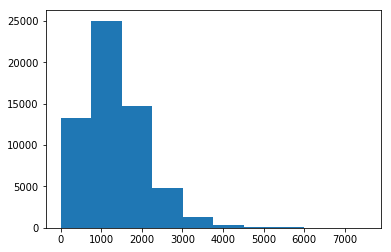

In [4]:
word_count = np.sort(text_df.TEXT.apply(lambda x: len(x.split(' '))))
max_word_count = np.max(word_count)
mean_word_count = np.mean(word_count)
min_word_count = np.min(word_count)
plt.hist(word_count)
min_word_count, mean_word_count, max_word_count

In [5]:
labels_df = pd.read_csv(path/'data/suicide_class.csv')
labels_df['labels'] = 1
labels_df.head()

,SUBJECT_ID,labels
0,71,1
1,119,1
2,449,1
3,468,1
4,519,1


In [6]:
# NB: left join drops 28 suicide labels with no notes!
df = pd.merge(text_df,labels_df,on='SUBJECT_ID',how='left')
df = df[['labels','TEXT','SUBJECT_ID','HADM_ID']]
df.columns = [col.lower() for col in df.columns]

df = df.fillna(0)
df[['labels','subject_id','hadm_id']] = df[['labels','subject_id','hadm_id']].astype(int)
df.to_csv(path/'data/std_format_processed_data.csv')

df.head()

,labels,text,subject_id,hadm_id
0,0,admission date discharge date service addendum...,22532,167853
1,0,admission date discharge date date of birth se...,13702,107527
2,0,admission date discharge date service cardioth...,13702,167118
3,0,admission date discharge date service medicine...,13702,196489
4,0,admission date discharge date date of birth se...,26880,135453


In [7]:
# percent of data with label=1 (suicides)
df.labels.sum()/len(df.labels)*100

1.5355729900087172